In [1]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the event log data.
events = pd.read_csv("https://raw.githubusercontent.com/janinerottmann/ITM22/main/data/ArtificialPatientTreatment.csv")
events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()

,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [3]:
print('Event log has {} rows and {} columns.'.format(events.shape[0], events.shape[1]))

Event log has 690 rows and 4 columns.


In [4]:
## Get the case start times to get the time deltas for the 'age' of each activity with respect to start
case_starts_ends = events.pivot_table(index='patient', aggfunc={'datetime': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='patient')
events['relativetime'] = events['datetime'] - events['casestart']
events.head(10)
     

,patient,action,resource,datetime,caseend,casestart,relativetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58
5,patient 0,Final consult,Dr. Ben,2017-01-09 08:29:28,2017-01-09 08:29:28,2017-01-02 11:40:11,6 days 20:49:17
6,patient 1,First consult,Dr. Anna,2017-01-02 12:50:35,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 00:00:00
7,patient 1,Physical test,Nurse Jesse,2017-01-02 13:59:14,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 01:08:39
8,patient 1,Blood test,Lab,2017-01-02 14:20:19,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 01:29:44
9,patient 1,X-ray scan,Team 1,2017-01-06 09:13:40,2017-01-06 16:49:21,2017-01-02 12:50:35,3 days 20:23:05


In [5]:
events['action'] = events['action'].apply(lambda x: x.strip())

delimiter = '___'

makeEventString = lambda x: delimiter.join(x)
makeEventString.__name__ = 'makeEventString'

numEvents = lambda x: len(x)
numEvents.__name__ = 'numEvents'


caselogs = events.pivot_table(index='patient', aggfunc={'action': [makeEventString, numEvents]})
caselogs = caselogs.reset_index()
caselogs.columns = ['patient', 'action_sequence', 'numactions']

events = pd.merge(events, caselogs, on='patient')
events['caselength'] = events['caseend'] - events['casestart']

events.head()

,patient,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,First consult___Blood test___Physical test___S...,6,6 days 20:49:17


In [6]:

## Get day of week
events['weekday'] = events['datetime'].apply(lambda x: x.weekday())
events['date'] = events['datetime'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['datetime'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days
events.head()

,patient,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,11,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,16,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,3,2017-01-05,2017-01-02,13,265378,3


**Exercise 2.1**: Visualize clinical events associated with each case in terms of clinical resources and examine weekly trends.

([<matplotlib.axis.YTick at 0x7f787a050130>,
 [Text(0, 0, 'patient 0'),
  Text(0, 5, 'patient 5'),
  Text(0, 10, 'patient 10'),
  Text(0, 15, 'patient 15'),
  Text(0, 20, 'patient 20'),
  Text(0, 25, 'patient 25'),
  Text(0, 30, 'patient 30'),
  Text(0, 35, 'patient 35'),
  Text(0, 40, 'patient 40'),
  Text(0, 45, 'patient 45'),
  Text(0, 50, 'patient 50'),
  Text(0, 55, 'patient 55'),
  Text(0, 60, 'patient 60'),
  Text(0, 65, 'patient 65'),
  Text(0, 70, 'patient 70'),
  Text(0, 75, 'patient 75'),
  Text(0, 80, 'patient 80'),
  Text(0, 85, 'patient 85'),
  Text(0, 90, 'patient 90'),
  Text(0, 95, 'patient 95')])

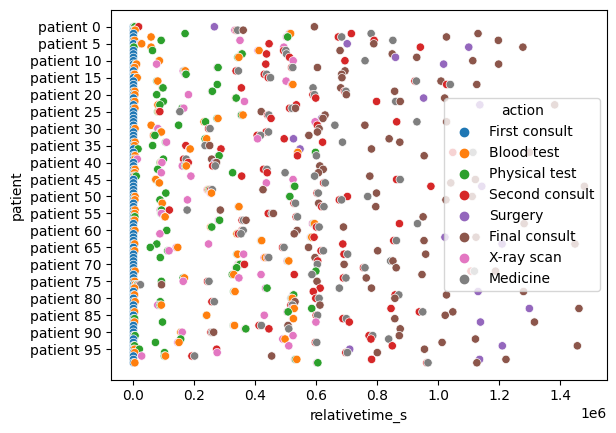

In [7]:
## Get an array of patient labels for the y axis - for graph labelling purposes
patientnums = [int(e) for e in events['patient'].apply(lambda x: x.strip('patient'))]
## Plot a scatter plot of patient events over relative time
ax = sns.scatterplot(x=events['relativetime_s'], y=events['patient'], hue=events['action'])
## Set y axis ticks so that you only show every 5th patient - for readability
plt.yticks(np.arange(min(patientnums), max(patientnums)+1, 5))

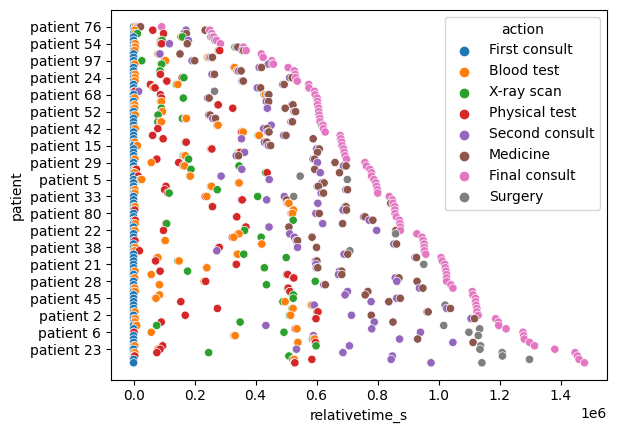

In [8]:
## Order by the case length
ordered = events.sort_values(by=['caselength', 'patient', 'relativetime_s'])
ax = sns.scatterplot(x=ordered['relativetime_s'], y=ordered['patient'], hue=ordered['action'])
plt.yticks(np.arange(min(patientnums), max(patientnums)+1, 5));
plt.show()

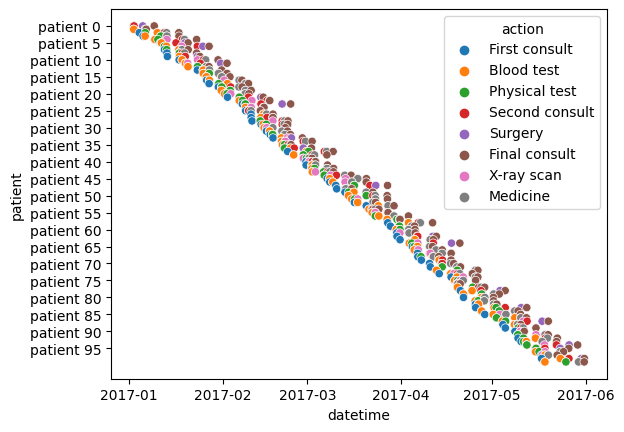

In [9]:
ax = sns.scatterplot(x=events['datetime'], y=events['patient'], hue=events['action']) 
plt.yticks(np.arange(min(patientnums), max(patientnums)+1, 5));

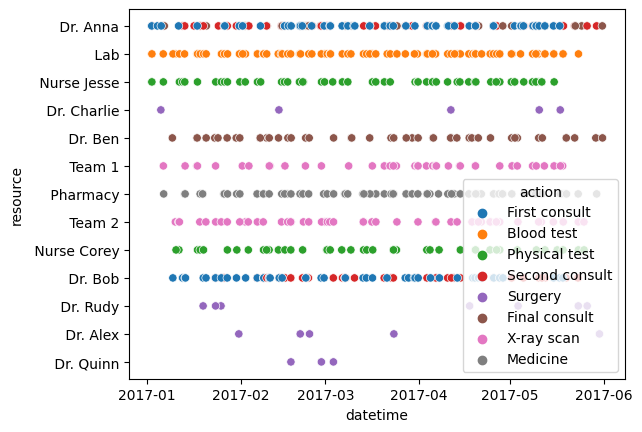

In [10]:
ax = sns.scatterplot(x=events['datetime'], y=events['resource'], hue=events['action'])

The following actions are common to all cases: Blood test, Final consult, First consult, Physical test, Second consult
The following actions are the ones that we wish to keep (not common to all cases): Medicine, Surgery, X-ray scan


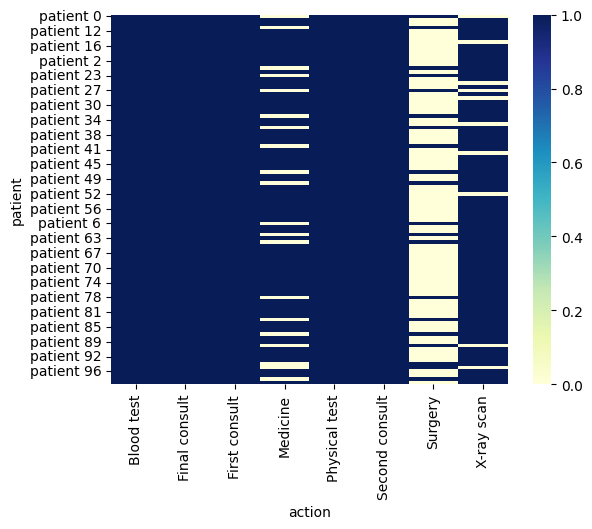

In [14]:
## Create a table giving the number of cases in which each event is present.
patient_events = pd.crosstab(events['patient'], events['action']) 
## Visualise in a heatmap
sns.heatmap(patient_events, cmap="YlGnBu")
## Calculate the number of unique event counts 
## This should be 1 for events which are shared by all patients.
nunique = patient_events.apply(pd.Series.nunique) 
## Identify the events which are shared by all 
shared_actions = nunique[nunique==1].index 
actions_to_keep = nunique[nunique>1].index 
print('The following actions are common to all cases: {}'.format(', '.join(shared_actions))) 
print('The following actions are the ones that we wish to keep (not common to all cases): {}'.format(', '.join(actions_to_keep)))